In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
Data = pd.read_csv(r"C:\Users\USER\Downloads\covid_19_clean_complete.csv.zip")

In [35]:
Data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [37]:
Data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [38]:
## Lets rename each column

Data.rename(columns={
    'Province/State': 'Province_state',
    'Country/Region': 'Country',
    'WHO Region': 'Who_region',
    'Lat': 'Latitude',
    'Long': 'Longitude'
}, inplace = True)

In [39]:
Data.columns

Index(['Province_state', 'Country', 'Latitude', 'Longitude', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Who_region'],
      dtype='object')

In [41]:
## lets convert the date column (object) to datetime

Data['Date'] = pd.to_datetime(Data['Date'])

In [42]:
Data.isnull().sum()

Province_state    34404
Country               0
Latitude              0
Longitude             0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
Who_region            0
dtype: int64

In [43]:
Data['Province_state']= Data['Province_state'].fillna('N/A')

In [44]:
Data.isnull().sum()

Province_state    0
Country           0
Latitude          0
Longitude         0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
Who_region        0
dtype: int64

In [45]:
## group by month

monthly_cases = Data.groupby(Data['Date'].dt.to_period('M'))['Confirmed'].sum()

In [46]:
monthly_cases

Date
2020-01        38534
2020-02      1663437
2020-03      9002815
2020-04     63391662
2020-05    144990399
2020-06    246525787
2020-07    362895848
Freq: M, Name: Confirmed, dtype: int64

In [47]:
## Group by country only

country_data = Data.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].max().reset_index()

In [48]:
country_data

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,20311
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,8114
3,Andorra,907,52,803,504
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,7382
183,Western Sahara,10,1,8,6
184,Yemen,1691,483,833,580
185,Zambia,4552,140,2815,2236


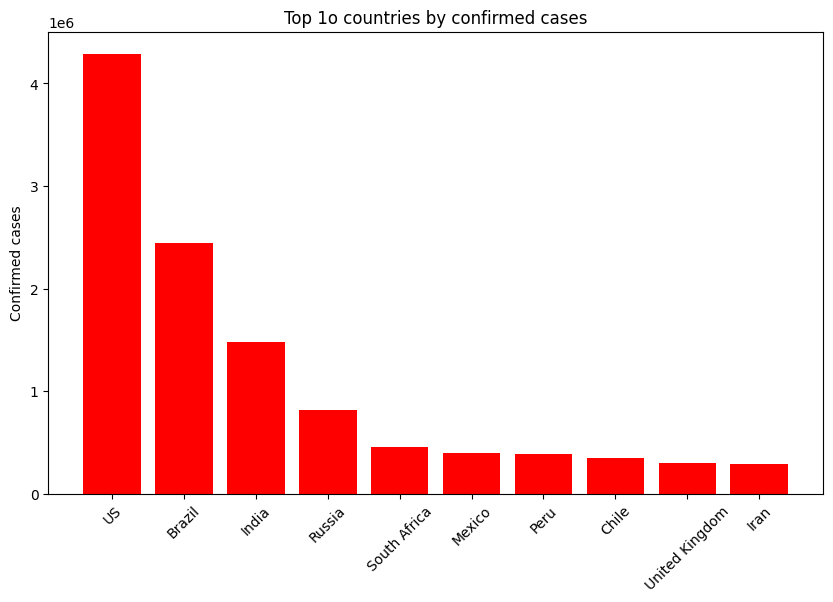

In [50]:
## Top 1o countries by confirmed cases
top_10 = country_data.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_10['Country'], top_10['Confirmed'], color='red')
plt.xticks(rotation=45)
plt.title('Top 1o countries by confirmed cases')
plt.ylabel('Confirmed cases')
plt.show()

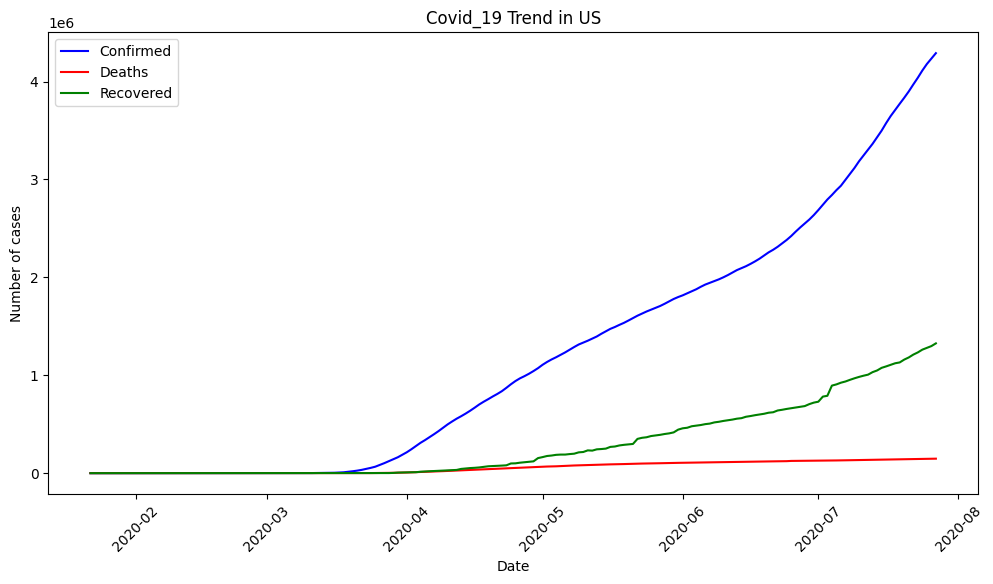

In [67]:
## country trend (US)
us = Data[Data['Country']=='US']

plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.plot(us['Date'], us['Confirmed'], label='Confirmed', color='blue')
plt.plot(us['Date'], us['Deaths'], label='Deaths', color='red')
plt.plot(us['Date'], us['Recovered'], label='Recovered', color='green')
plt.title('Covid_19 Trend in US')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

In [63]:
## who region analysis

region_cases = Data.groupby('Who_region')['Confirmed'].max().reset_index()



C:\Users\USER\AppData\Local\Temp\ipykernel_8852\3904627301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Who_region', y='Confirmed', data=region_cases, palette='viridis')


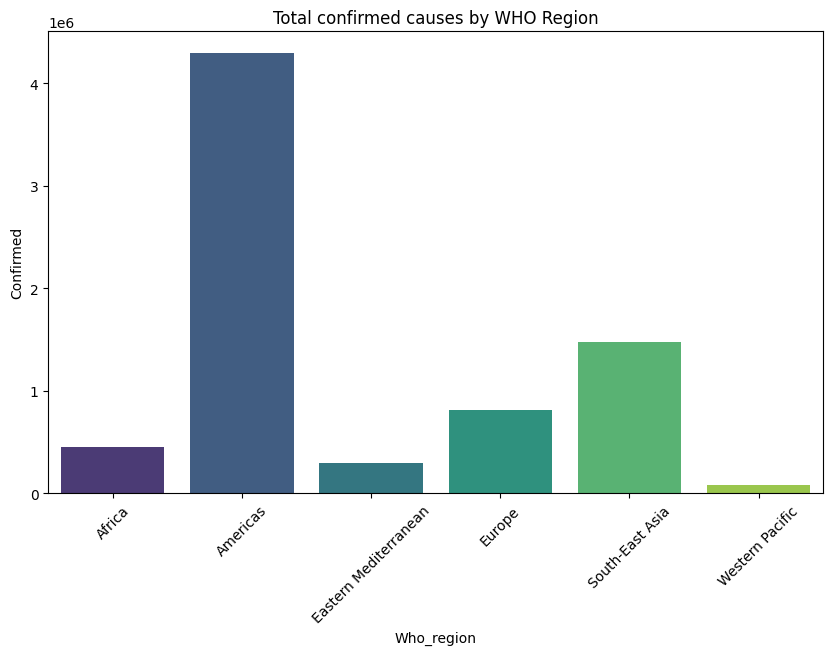

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x='Who_region', y='Confirmed', data=region_cases, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total confirmed causes by WHO Region')
plt.show()

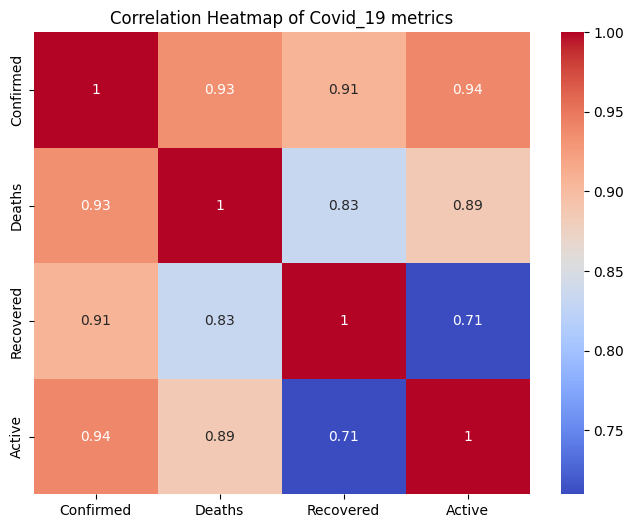

In [68]:
## correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(country_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Covid_19 metrics')
plt.show()

In [ ]:
Data.to_excel('Covid_cleaned)